In [1]:
import os,sys
from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import numpy as np
import skimage.util
import scipy.ndimage.filters
import scipy.misc
import scipy.io

In [4]:
# Collecting all the source files
files = [f for f in listdir('pristine/') if isfile(join('pristine/', f))]

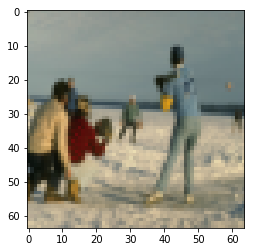

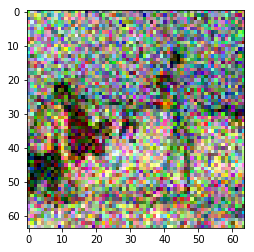

In [87]:
# AWGN Workout
f = "pristine/" + files[10]
I = Image.open(f)
I_res = scipy.misc.imresize(I, [64, 64, 3])
plt.imshow(I_res)
plt.draw()
plt.show()
tilda_I = skimage.util.random_noise(I_res,mode='gaussian',var=0.05)
plt.imshow(tilda_I)
plt.draw()
plt.show()

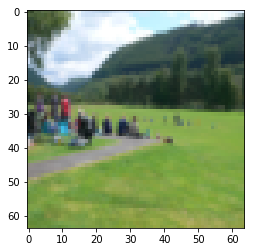

(64, 64, 3)


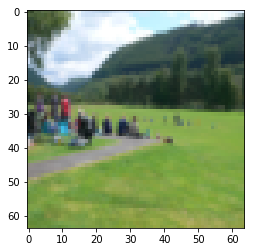

In [113]:
plt.imshow(I_res)
plt.draw()
plt.show()
awgn_clean = np.zeros((64, 64, 3, 2), dtype='uint8')
#awgn_clean = np.stack((np.array(tilda_I, dtype='uint8'), 
#                       np.array(I_res, dtype='uint8')), axis=3)
awgn_clean[:,:,:,0] = tilda_I
awgn_clean[:,:,:,1] = I_res
t = awgn_clean[:,:,:,1]
print t.shape
plt.imshow(t)
plt.draw()
plt.show()

In [114]:
# AWGN
awgn_clean = np.zeros((64,64,3,5*len(files)), dtype='uint8') 
awgn_dist = np.zeros((64,64,3,5*len(files)), dtype='uint8')
for idx in range(len(files)):
    f = "pristine/" + files[idx]
    I = Image.open(f)
    I_res = scipy.misc.imresize(I, [64, 64, 3])
    plt.imshow(I)
    
    # No distortion
    I_dist = I_res
    awgn_clean[:, :, :, 5*idx] = I_res
    awgn_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    I_dist = skimage.util.random_noise(I_res, mode='gaussian', var=0.001)
    awgn_clean[:, :, :, 5*idx+1] = I_res
    awgn_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    I_dist = skimage.util.random_noise(I_res, mode='gaussian', var=0.01)
    awgn_clean[:, :, :, 5*idx+2] = I_res
    awgn_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    I_dist = skimage.util.random_noise(I_res, mode='gaussian', var=0.05)
    awgn_clean[:, :, :, 5*idx+3] = I_res
    awgn_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    I_dist = skimage.util.random_noise(I_res, mode='gaussian', var=0.1)
    awgn_clean[:, :, :, 5*idx+4] = I_res
    awgn_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if idx%5 == 0:
        print '%d/%d images done!' % (idx,len(files))
print 'Adding AWGN done!'
scipy.io.savemat('awgn_data.mat',{'clean': awgn_clean, 'dist': awgn_dist})

0/125 images done!
5/125 images done!
10/125 images done!
15/125 images done!
20/125 images done!
25/125 images done!
30/125 images done!
35/125 images done!
40/125 images done!
45/125 images done!
50/125 images done!
55/125 images done!
60/125 images done!
65/125 images done!
70/125 images done!
75/125 images done!
80/125 images done!
85/125 images done!
90/125 images done!
95/125 images done!
100/125 images done!
105/125 images done!
110/125 images done!
115/125 images done!
120/125 images done!
Adding AWGN done!


(64, 64, 3, 625) (64, 64, 3, 625)


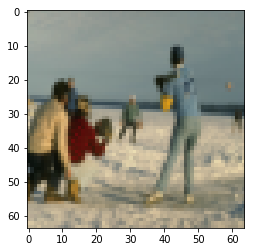

In [115]:
# AWGN check
data = scipy.io.loadmat('awgn_data.mat')
awgn_clean = data['clean']
awgn_dist = data['dist']
print awgn_clean.shape, awgn_dist.shape
plt.imshow(awgn_clean[:,:,:,50])
plt.draw()
plt.show()

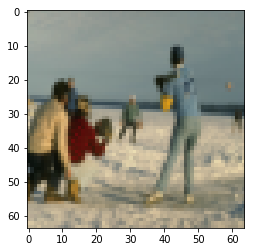

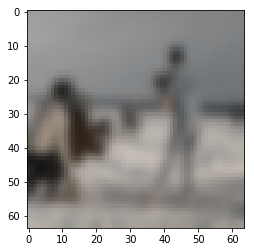

In [145]:
# GBLUR Workout
f = "pristine/" + files[10]
I = Image.open(f)
I_res = scipy.misc.imresize(I, [64, 64])
plt.imshow(I_res)
plt.draw()
plt.show()
tilda_I = scipy.ndimage.filters.gaussian_filter(I_res, sigma=1.5)
plt.imshow(tilda_I)
plt.draw()
plt.show()

In [146]:
# GBLUR
gblur_clean = np.zeros((64,64,3,5*len(files)), dtype='uint8') 
gblur_dist = np.zeros((64,64,3,5*len(files)), dtype='uint8')
for idx in range(len(files)):
    f = "pristine/" + files[idx]
    I = Image.open(f)
    I_res = scipy.misc.imresize(I, [64, 64, 3])
    plt.imshow(I)
    
    # No distortion
    I_dist = I_res
    gblur_clean[:, :, :, 5*idx] = I_res
    gblur_dist[:, :, :, 5*idx] = I_dist
    # Distortion level 1
    I_dist = scipy.ndimage.filters.gaussian_filter(I_res, sigma=0.5)
    gblur_clean[:, :, :, 5*idx+1] = I_res
    gblur_dist[:, :, :, 5*idx+1] = I_dist
    # Distortion level 2
    I_dist = scipy.ndimage.filters.gaussian_filter(I_res, sigma=1.0)
    gblur_clean[:, :, :, 5*idx+2] = I_res
    gblur_dist[:, :, :, 5*idx+2] = I_dist
    # Distortion level 3
    I_dist = scipy.ndimage.filters.gaussian_filter(I_res, sigma=1.2)
    gblur_clean[:, :, :, 5*idx+3] = I_res
    gblur_dist[:, :, :, 5*idx+3] = I_dist
    # Distortion level 4
    I_dist = scipy.ndimage.filters.gaussian_filter(I_res, sigma=1.5)
    gblur_clean[:, :, :, 5*idx+4] = I_res
    gblur_dist[:, :, :, 5*idx+4] = I_dist
    
    # Display
    if idx%5 == 0:
        print '%d/%d images done!' % (idx,len(files))
print 'Adding GBLUR done!'
scipy.io.savemat('gblur_data.mat',{'clean': gblur_clean, 'dist': gblur_dist})

0/125 images done!
5/125 images done!
10/125 images done!
15/125 images done!
20/125 images done!
25/125 images done!
30/125 images done!
35/125 images done!
40/125 images done!
45/125 images done!
50/125 images done!
55/125 images done!
60/125 images done!
65/125 images done!
70/125 images done!
75/125 images done!
80/125 images done!
85/125 images done!
90/125 images done!
95/125 images done!
100/125 images done!
105/125 images done!
110/125 images done!
115/125 images done!
120/125 images done!
Adding GBLUR done!


(64, 64, 3, 625) (64, 64, 3, 625)


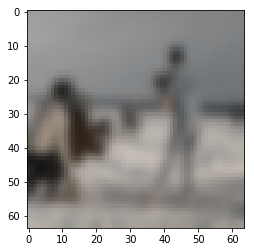

In [147]:
# GBLUR check
data = scipy.io.loadmat('gblur_data.mat')
awgn_clean = data['clean']
awgn_dist = data['dist']
print gblur_clean.shape, gblur_dist.shape
plt.imshow(gblur_dist[:,:,:,54])
plt.draw()
plt.show()

In [11]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

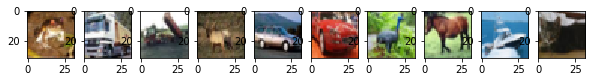

In [10]:
# Compare original images with their reconstructions
f, a = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    a[i].imshow(x_train[i,:,:,:])
plt.draw()
plt.show()